### Text Classification Exercise : News Category Classifier

In [1]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [1]:
#import pandas library
import pandas as pd

#read the dataset "news_dataset.json" provided and load it into dataframe "df"
df = pd.read_json("../Datasets/news_dataset2.json")

#print the shape of data
print(df.shape)

#print the top5 rows
print(df.head())

(7500, 2)
                                                text  category
0  Larry Nassar Blames His Victims, Says He 'Was ...     CRIME
1       Woman Beats Cancer, Dies Falling From Horse      CRIME
2  Vegas Taxpayers Could Spend A Record $750 Mill...    SPORTS
3  This Richard Sherman Interception Literally Sh...    SPORTS
4  7 Things That Could Totally Kill Weed Legaliza...  BUSINESS


In [6]:
#check the distribution of labels
df.category.value_counts()

,count
category,
CRIME,2500
SPORTS,2500
BUSINESS,2500


In [7]:
#Add the new column "label_num" which gives a unique number to each of these labels
df['label_num'] = df['category'].map({'CRIME' : 0,
                                      'SPORTS': 1,
                                      'BUSINESS': 2
                                      })

#check the results with top 5 rows
df.head()

,text,category,label_num
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1
3,This Richard Sherman Interception Literally Sh...,SPORTS,1
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2


#### Preprocess the text

In [8]:
#use this utility function to preprocess the text
#1. Remove the stop words
#2. Convert to base form using lemmatisation

def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [10]:
#create a new column "preprocessed_text" which store the clean form of given text [use apply and lambda function]
df['preprocessed_text'] = df['text'].apply(lambda text: preprocess(text))

In [11]:
df.head()

,text,category,label_num,preprocessed_text
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame Victims say victimize newly...
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer dies fall Horse
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend record $ 750 million New...
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill weed legalization Buzz


#### Get the spacy embeddings for each preprocessed text

In [12]:
#create a new column "vector" that store the vector representation of each pre-processed text
df['vector'] = df['preprocessed_text'].apply(lambda text: nlp(text).vector)

In [13]:
df.head()

,text,category,label_num,preprocessed_text,vector
0,"Larry Nassar Blames His Victims, Says He 'Was ...",CRIME,0,Larry Nassar blame Victims say victimize newly...,"[-0.3472573, 0.021758832, -0.2137525, -0.01718..."
1,"Woman Beats Cancer, Dies Falling From Horse",CRIME,0,woman Beats Cancer dies fall Horse,"[-0.16791849, 0.43708333, 0.035527337, 0.01661..."
2,Vegas Taxpayers Could Spend A Record $750 Mill...,SPORTS,1,Vegas Taxpayers spend record $ 750 million New...,"[0.053351898, 0.08053064, -0.05101806, -0.1991..."
3,This Richard Sherman Interception Literally Sh...,SPORTS,1,Richard Sherman Interception literally shake W...,"[-0.038867258, 0.28459162, 0.071352966, -0.045..."
4,7 Things That Could Totally Kill Weed Legaliza...,BUSINESS,2,7 thing totally kill weed legalization Buzz,"[-0.20180944, 0.11867001, 0.0036708585, -0.189..."


#### Train-Test splitting

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [15]:
X_train.shape

(6000,)

Reshape the X_train and X_test so as to fit for models

In [16]:
import numpy as np

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [17]:
X_train_2d.shape

(6000, 300)

In [18]:
# import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

#### Attempt 1:

    use spacy glove embeddings for text vectorization.

    use Decision Tree as the classifier.

    print the classification report.

In [25]:
#1. creating a Decision Tree model object
model = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
model.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = model.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       486
           1       0.73      0.78      0.75       479
           2       0.78      0.74      0.76       535

    accuracy                           0.76      1500
   macro avg       0.76      0.77      0.76      1500
weighted avg       0.77      0.76      0.76      1500



#### Attempt 2:

    use spacy glove embeddings for text vectorization.
    use MultinomialNB as the classifier after applying the MinMaxscaler.
    print the classification report.


In [26]:
#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object
model = MultinomialNB()

#2. fit with all_train_embeddings(scaled) and y_train
model.fit(scaled_train_embed, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = model.predict(scaled_test_embed)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       486
           1       0.89      0.88      0.89       479
           2       0.88      0.88      0.88       535

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



#### Attempt 3:

    use spacy glove embeddings for text vectorization.
    use KNeighborsClassifier as the classifier.
    print the classification report.

In [38]:
#1. creating a KNN model object
model = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
model.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = model.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       486
           1       0.93      0.87      0.90       479
           2       0.91      0.87      0.89       535

    accuracy                           0.89      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.90      0.89      0.89      1500



#### Attempt 4:

    use spacy glove embeddings for text vectorization.
    use RandomForestClassifier as the classifier.
    print the classification report.

In [39]:
#1. creating a Random Forest model object
model = RandomForestClassifier()

#2. fit with all_train_embeddings and y_train
model.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = model.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       486
           1       0.90      0.90      0.90       479
           2       0.91      0.88      0.89       535

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



#### Attempt 5:

    use spacy glove embeddings for text vectorization.
    use GradientBoostingClassifier as the classifier after applying the MinMaxscaler.
    print the classification report.

In [40]:
#1. creating a GradientBoosting model object
model = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
model.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = model.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       486
           1       0.90      0.92      0.91       479
           2       0.91      0.90      0.90       535

    accuracy                           0.90      1500
   macro avg       0.90      0.90      0.90      1500
weighted avg       0.90      0.90      0.90      1500



#### Print the confusion Matrix with the best model got

Text(95.72222222222221, 0.5, 'Truth')

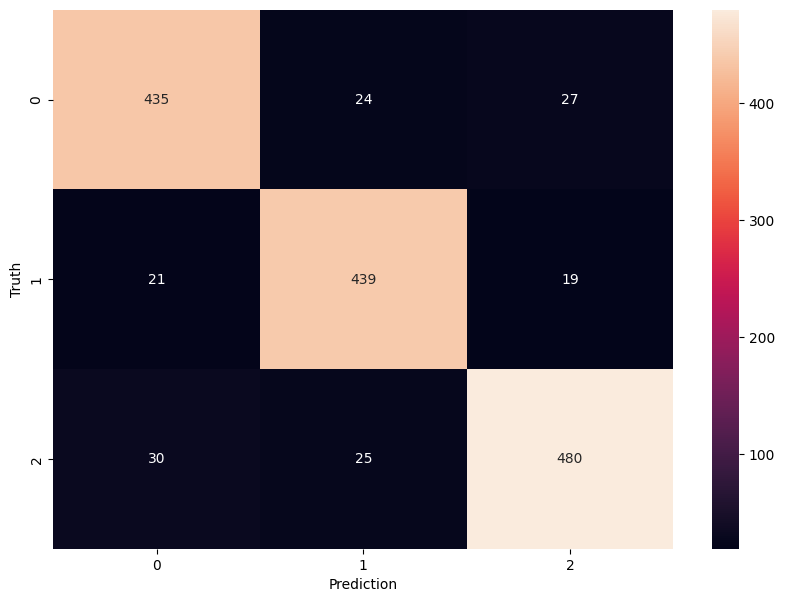

In [41]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')